In [1]:
from copy import deepcopy
from random import randint
import cv2
import numpy as np
import pickle
from progress.bar import IncrementalBar
import matplotlib.pyplot as plt
from numpy.random import randint
import pickle


def print_img(img, title = '', shape = (12,9)):
  plt.figure(figsize = shape)
  plt.title(title)
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

def draw_triangle(image:np.ndarray,point:list, cathet_len:int, color:list):
  triangle_cnt = np.array([
    [point[0], point[1]-cathet_len],
    [point[0], point[1]],
    [point[0]+cathet_len, point[1]]
  ])
  image = cv2.drawContours(image, [triangle_cnt], 0, color, -1)

In [2]:
img_1 = cv2.imread('lab_10_1.png')
img_2 = cv2.imread('lab_10_2.png')
img_3 = cv2.imread('lab_10_3.png')

with open('lab_10_1.pkl','rb') as bin_file:
    sample_1 = pickle.load(bin_file)
    sample_1 = np.vstack([np.asarray(sample_1['triangles']), np.asarray(sample_1['squares'])]).astype(np.float32)
    sample_1_points = np.flip(sample_1,1)
with open('lab_10_2.pkl','rb') as bin_file:
    sample_2 = pickle.load(bin_file)
    sample_2 = np.vstack([np.asarray(sample_2['triangles']), np.asarray(sample_2['squares'])]).astype(np.float32)
    sample_2_points = np.flip(sample_2,1)
with open('lab_10_3.pkl','rb') as bin_file:
    sample_3 = pickle.load(bin_file)
    sample_3 = np.vstack([np.asarray(sample_3['triangles']), np.asarray(sample_3['squares'])]).astype(np.float32)
    sample_3_points = np.flip(sample_3,1)

In [3]:
side_size = 10

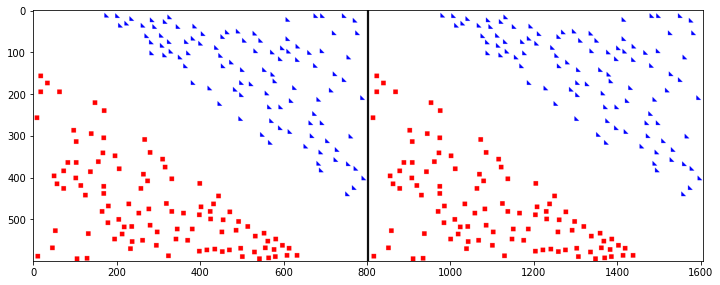

In [4]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 5, 1)
flags = cv2.KMEANS_RANDOM_CENTERS
compactness,labels,centers = cv2.kmeans(sample_1_points,2,None,criteria,10,flags)

img_1_draw =  np.full((600,800,3), [255,255,255],np.uint8)
for i in range(len(labels)):
    point = np.asarray(sample_1[i], dtype=int)
    if labels[i] == 0:
        draw_triangle(img_1_draw,point, side_size,[255,0,0])
    elif labels[i] == 1:
        cv2.rectangle(img_1_draw, [point[0]-side_size, point[1]-side_size], point, (0,0,255), -1)

print_img(np.hstack((img_1_draw,np.full((600,5,3), [0,0,0],np.uint8) ,img_1)))


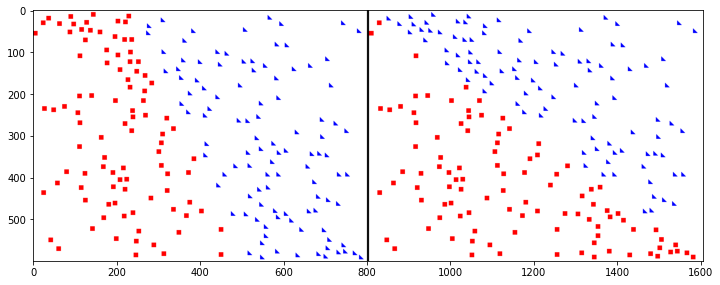

In [317]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 1, 1)
flags = cv2.KMEANS_RANDOM_CENTERS
compactness,labels,centers = cv2.kmeans(sample_2_points,2,None,criteria,10,flags)

img_2_draw =  np.full((600,800,3), [255,255,255],np.uint8)
for i in range(len(labels)):
    point = np.asarray(sample_2[i], dtype=int)
    if labels[i] == 0:
        draw_triangle(img_2_draw,point, side_size,[255,0,0])
    elif labels[i] == 1:
        cv2.rectangle(img_2_draw, [point[0]-side_size, point[1]-side_size], point, (0,0,255), -1)

print_img(np.hstack((img_2_draw,np.full((600,5,3), [0,0,0],np.uint8) ,img_2)))

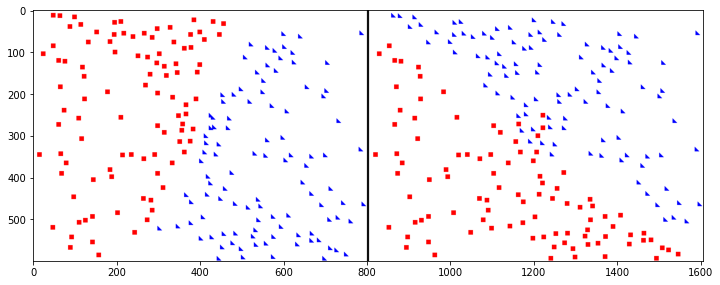

: 

In [328]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 12, 1)
flags = cv2.KMEANS_RANDOM_CENTERS
compactness,labels,centers = cv2.kmeans(sample_3_points,2,None,criteria,10,flags)

img_3_draw =  np.full((600,800,3), [255,255,255],np.uint8)
for i in range(len(labels)):
    point = np.asarray(sample_3[i], dtype=int)
    if labels[i] == 0:
        draw_triangle(img_3_draw,point, side_size,[255,0,0])
    elif labels[i] == 1:
        cv2.rectangle(img_3_draw, [point[0]-side_size, point[1]-side_size], point, (0,0,255), -1)

print_img(np.hstack((img_3_draw,np.full((600,5,3), [0,0,0],np.uint8) ,img_3)))